# Collider Bias

Here is a simple example to illustate the collider bias.

Here the idea is that people who get to Hollywood have to have high congeniality = talent + coolness. This simple example explains an anecdotal observation that "talent and coolness are negatively correlated" for celebrities.  

In [2]:
install.packages("dagitty")
library(dagitty)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The dagitty package can be used to draw the corresponding DAG, where $T$ denotes the talent of an individual, $B$ the coolness and $C$ congeniality which decides whether people get to Hollywood.

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



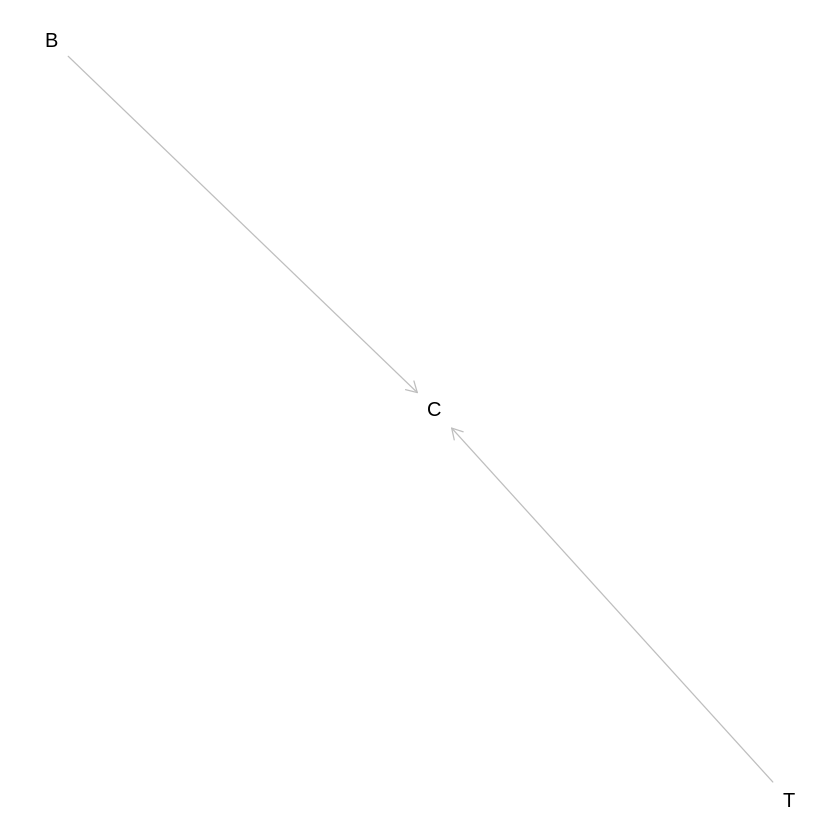

In [3]:
g <- dagitty( "dag{ T -> C <- B }" )
plot(g)

Next, we simulate data which follow the model above.

In [4]:
# collider bias
n <- 1000000
T <- rnorm(n)   # talent
B <- rnorm(n)   # coolness
C <- T + B + rnorm(n) # congeniality
T.H <- subset(T, C>0) # condition on C>0
B.H <- subset(B, C>0) # condition on C>0

Exercise 1: What would you expect to see if you run a regression of T (talent) on B (coolness). Is there a significant association? Run a regression to test your hypothesis.

In [6]:
summary(lm(T~ B))  # regression of T on B


Call:
lm(formula = T ~ B)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0958 -0.6760 -0.0003  0.6737  4.8048 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.0016323  0.0010005  -1.631    0.103
B           -0.0009245  0.0010018  -0.923    0.356

Residual standard error: 1.001 on 999998 degrees of freedom
Multiple R-squared:  8.517e-07,	Adjusted R-squared:  -1.483e-07 
F-statistic: 0.8517 on 1 and 999998 DF,  p-value: 0.3561


Since $T$ and $B$ are independent (normally distributed) random variables, there is no correlation/association between talent and coolness.

Exercise 2: What would you expect to see if you run a regression of T (talent) on both B (coolness) and C (congeniality). Is there a significant association? Run a regression to test your hypothesis.

In [7]:
summary(lm(T~ B +C)) #regression of T on B and C


Call:
lm(formula = T ~ B + C)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6759 -0.4770  0.0002  0.4775  3.4017 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.0012591  0.0007071   -1.781    0.075 .  
B           -0.5008500  0.0008664 -578.057   <2e-16 ***
C            0.5002064  0.0004997 1001.005   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7071 on 999997 degrees of freedom
Multiple R-squared:  0.5005,	Adjusted R-squared:  0.5005 
F-statistic: 5.01e+05 on 2 and 999997 DF,  p-value: < 2.2e-16


Funnily enough adding $C$ to the regression this induces a negative correlation between talent and coolness.

Exercise 3: Run a regression of T (talent) on B (coolness) where you only consider the subsample where $C>0$. What do you expect?

In [8]:
summary(lm(T.H~ B.H)) # regression of T on B, conditional on C>0.


Call:
lm(formula = T.H ~ B.H)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4245 -0.5846 -0.0224  0.5629  4.3008 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.584921   0.001364   428.9   <2e-16 ***
B.H         -0.271629   0.001364  -199.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8558 on 499702 degrees of freedom
Multiple R-squared:  0.07356,	Adjusted R-squared:  0.07356 
F-statistic: 3.968e+04 on 1 and 499702 DF,  p-value: < 2.2e-16


Adding $C$ to the regression in Exercise 2 is the same as conditioning on $C$ which determines the set of actors or celebrities. Therefore, we see a negative correlation between talent and coolness again.

We can also use package Dagitty to illustrate collider bias, also known as M-bias.

In [9]:
## If we want to infer causal effect of B on T,
## we can apply the command to figure out
## variables we should condition on:

adjustmentSets( g, "T", "B" )

## empty set -- we should not condition on the additional
## variable C.

## Generate data where C = .5T + .5B
set.seed( 123)
d <- simulateSEM( g, .5 )
confint( lm( T ~ B, d ) )["B",] # includes 0
confint( lm( T ~ B + C, d ) )["B",] # does not include 0


 {}

2.5 %      97.5 % 
-0.15524753  0.03313395

2.5 %     97.5 % 
-0.4840231 -0.3094251

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



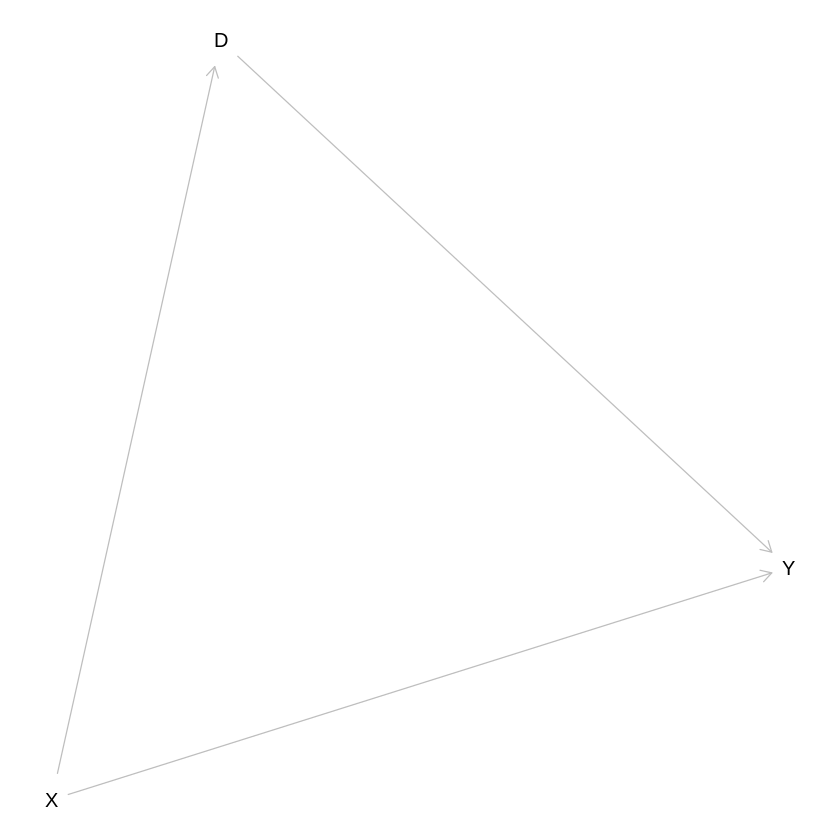

In [10]:
h <- dagitty( "dag{ D -> Y; X -> Y; X -> D }" )
plot(h)

In [11]:
adjustmentSets( h, "D", "Y" )

{ X }